<a href="https://colab.research.google.com/github/shahzadahmad3/Natural-Language-Processing/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🔹 Why Do We Need CNNs?**

In the previous lesson, we used a fully connected neural network (FCNN) to classify handwritten digits. However, FCNNs have two major problems when dealing with images:

**1️⃣ Too many parameters** – A 28×28 image has 784 pixels. A color image (RGB) with 100×100 pixels has 30,000 features! Fully connected layers become too large and inefficient.

**2️⃣ Loss of spatial features** – FCNNs treat all pixels independently, ignoring patterns like edges, textures, and shapes.

**👉 Solution?** Convolutional Neural Networks (CNNs)**bold text**, which **preserve spatial relationships** and r**educe parameters** using **convolutions**.

**How CNNs Work?**
CNNs process images through three main operations:
1.   **Convolution Layer** – Detects features like edges, corners, and textures.
2.   **Pooling Layer** – Reduces spatial size to make computation efficient.
2.   **Fully Connected Layer** – Performs classification.

In [1]:
#We will build a CNN model to classify MNIST handwritten digits.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Reshape to add channel dimension (28x28 grayscale images → 28x28x1)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize pixel values (0-255 → 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0
# Why reshape to (28,28,1)? CNNs expect images in 3D format (height, width, channels).
# Why normalize? Helps the model train faster.

In [13]:
model=keras.Sequential([
    # Convolutional Layer 1 (Extracts features)
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling Layer 1 (Reduces size)
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Convolutional Layer 2 (Extracts features more)
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    # Pooling Layer 2 (Further downsampling.)
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Flatten Layer (Converts 2D features into 1D.)
    keras.layers.Flatten(),
    # Fully Connected Layer (Learns complex patterns)
    keras.layers.Dense(units=128, activation='relu'),
    # Output Layer (Outputs probabilities for digits (0-9))
    keras.layers.Dense(units=10, activation='softmax')
]
)

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Why Adam? It adapts learning rates automatically.
# Why sparse_categorical_crossentropy? It’s used for multi-class classification.

In [17]:
#Train the Model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Use y_test instead of y_train for validation labels
# What happens during training? ✔ Forward pass (convolution, activation, pooling).
# ✔ Compute loss (difference between predicted and actual label).
# ✔ Backpropagation (update weights to reduce loss).

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9916 - loss: 0.0255 - val_accuracy: 0.9891 - val_loss: 0.0345
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9901 - val_loss: 0.0349
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 35ms/step - accuracy: 0.9952 - loss: 0.0145 - val_accuracy: 0.9922 - val_loss: 0.0244
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9965 - loss: 0.0106 - val_accuracy: 0.9921 - val_loss: 0.0284
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9974 - loss: 0.0078 - val_accuracy: 0.9918 - val_loss: 0.0273
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9974 - loss: 0.0070 - val_accuracy: 0.9933 - val_loss: 0.0254
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9976 - loss: 0.0059 - val_accuracy: 0.9909 - val_loss: 0.0343
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9983 -

In [18]:
test_loss, test_acc=model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9879 - loss: 0.0616
Test Accuracy: 0.9905999898910522


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


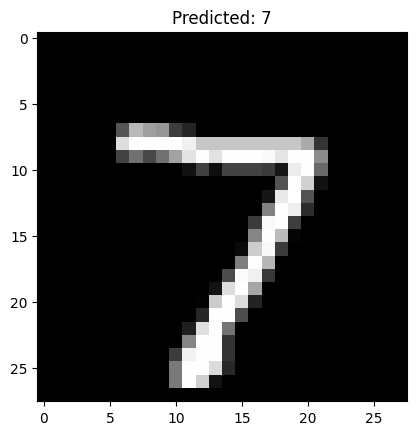

In [19]:
prediction=model.predict(X_test)

plt.imshow(X_test[0].reshape(28,28),cmap='gray')
plt.title(f"Predicted: {np.argmax(prediction[0])}")
plt.show()

In [20]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)